<a href="https://colab.research.google.com/github/Malbasahi/Graduate_Admissions_Prediction_using_Classifications/blob/main/Graduate_Admissions_using_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    auc,
    make_scorer,
    f1_score,
)

In [3]:
# Load your dataset
data = pd.read_csv('/content/Admission_Predict_Ver1.1.csv')

In [4]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
# Explore your dataset
print(data.head())  # Display the first few rows of the dataset
print(data.info())  # Check data types and missing values

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 

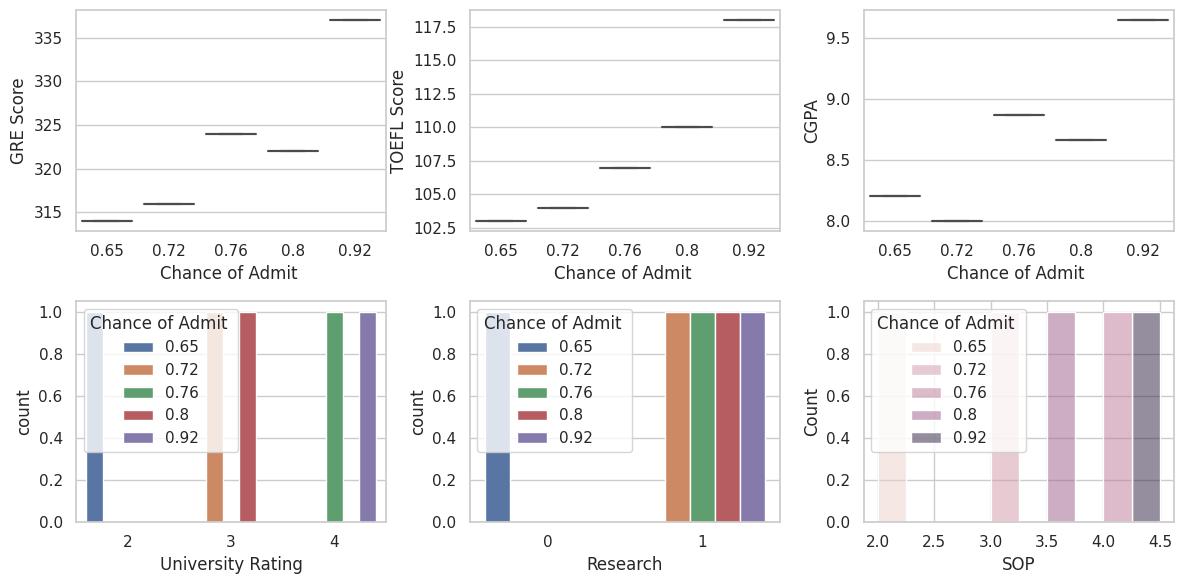

In [6]:
# Take the top 5 rows of the dataset
top_5_data = data.head(5)

# Data Visualization
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.boxplot(x='Chance of Admit ', y='GRE Score', data=top_5_data)
plt.subplot(2, 3, 2)
sns.boxplot(x='Chance of Admit ', y='TOEFL Score', data=top_5_data)
plt.subplot(2, 3, 3)
sns.boxplot(x='Chance of Admit ', y='CGPA', data=top_5_data)
plt.subplot(2, 3, 4)
sns.countplot(x='University Rating', hue='Chance of Admit ', data=top_5_data)
plt.subplot(2, 3, 5)
sns.countplot(x='Research', hue='Chance of Admit ', data=top_5_data)
plt.subplot(2, 3, 6)
sns.histplot(data=top_5_data, x="SOP", hue="Chance of Admit ", kde=True, bins=10)
plt.tight_layout()
plt.show()

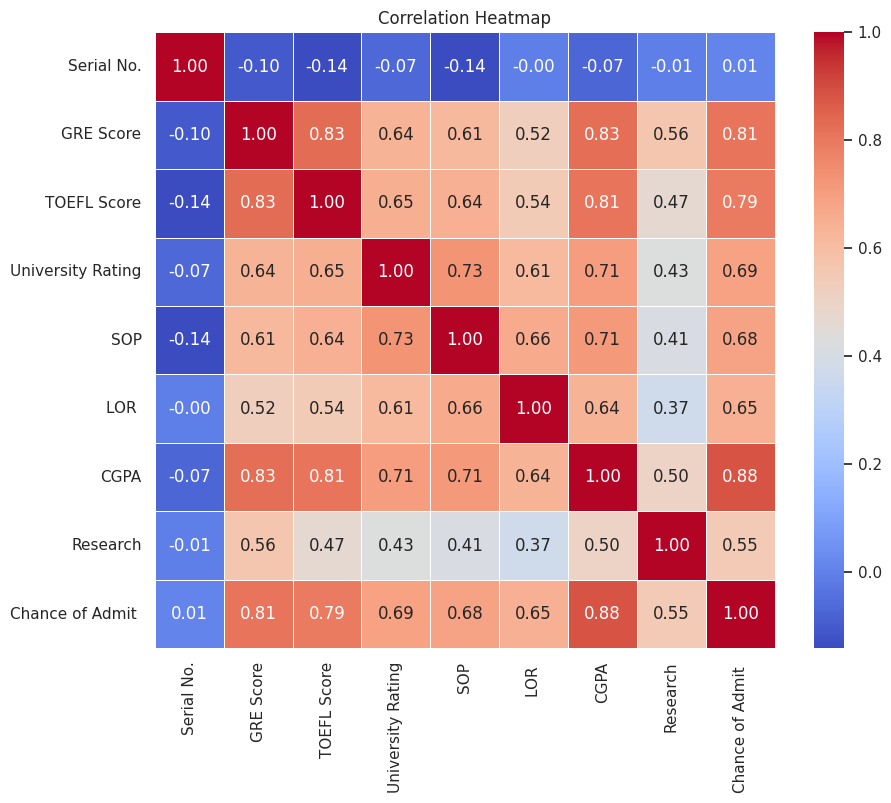

In [7]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [8]:
# Drop 'Serial No.' column as it's not informative for modeling
data = data.drop(columns=['Serial No.'])

In [10]:
# Split data into features (X) and target (y)
X = data.drop('Chance of Admit ', axis=1)  # Features (exclude the target column)
y = (data['Chance of Admit '] > 0.7).astype(int)  # Target variable (Binary: 1 if Chance of Admit > 0.7, else 0)

In [11]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled features
scaled_data = pd.DataFrame(X_scaled, columns=X.columns)

# Display the scaled data
print(scaled_data)

     GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  \
0     1.819238     1.778865           0.775582  1.137360  1.098944  1.776806   
1     0.667148    -0.031601           0.775582  0.632315  1.098944  0.485859   
2    -0.041830    -0.525364          -0.099793 -0.377773  0.017306 -0.954043   
3     0.489904     0.462163          -0.099793  0.127271 -1.064332  0.154847   
4    -0.219074    -0.689952          -0.975168 -1.387862 -0.523513 -0.606480   
..         ...          ...                ...       ...       ...       ...   
495   1.376126     0.132987           1.650957  1.137360  0.558125  0.734118   
496   1.819238     1.614278           1.650957  1.642404  1.639763  2.140919   
497   1.198882     2.108041           1.650957  1.137360  1.639763  1.627851   
498  -0.396319    -0.689952           0.775582  0.632315  1.639763 -0.242367   
499   0.933015     0.955926           0.775582  1.137360  1.098944  0.767220   

     Research  
0    0.886405  
1    0.

In [12]:
# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)

In [13]:
# Define the numerical and categorical features
numerical_features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA']
categorical_features = ['Research']

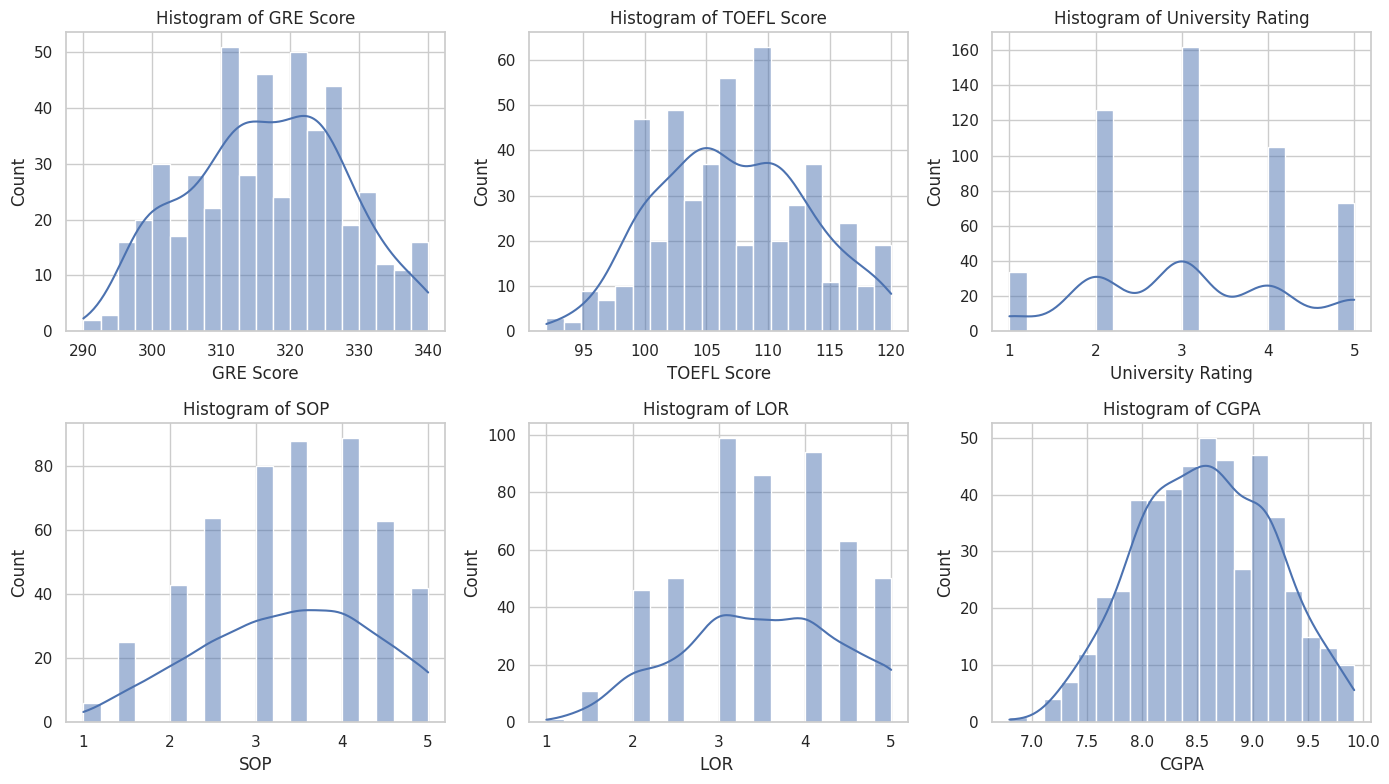

In [15]:
# Plot histograms for numerical features
plt.figure(figsize=(14, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=data, x=feature, kde=True, bins=20)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

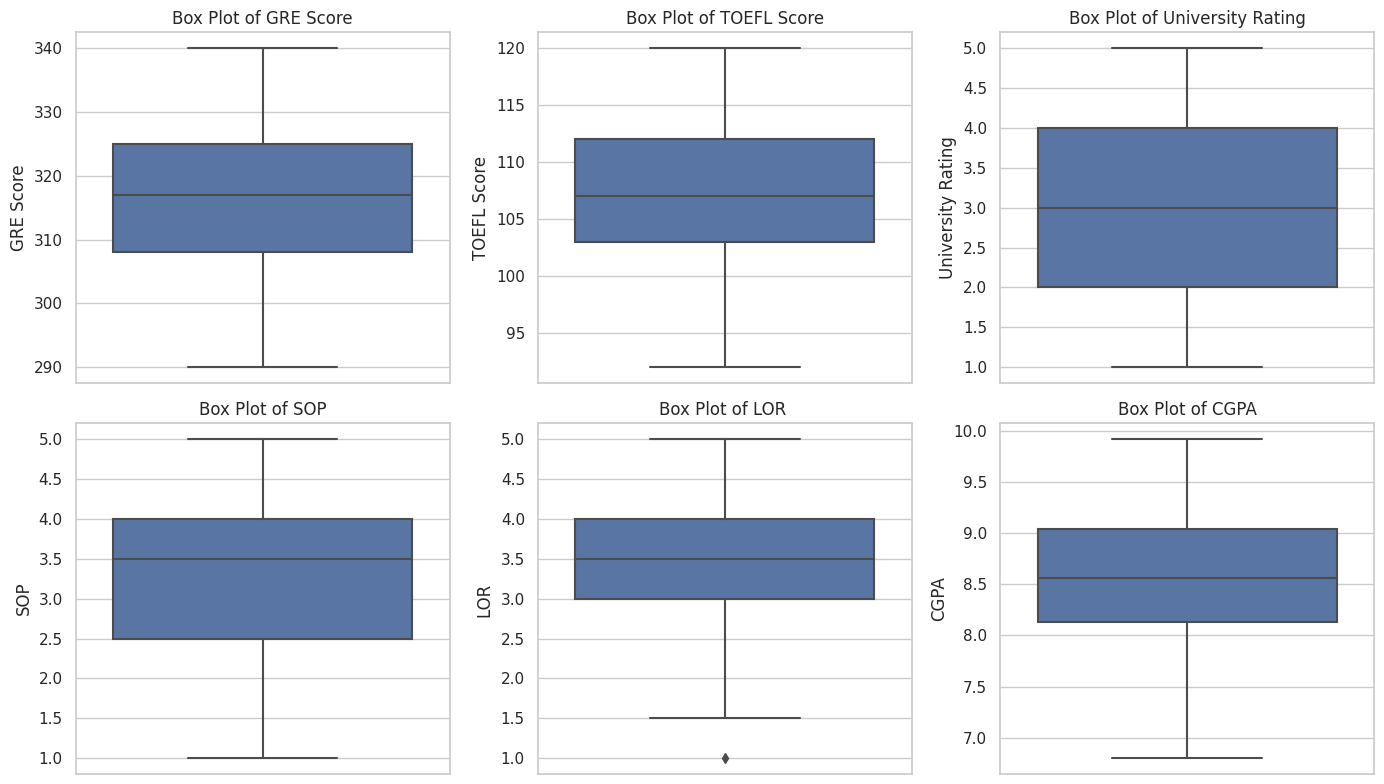

In [16]:
# Plot box plots for numerical features
plt.figure(figsize=(14, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data, y=feature)
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

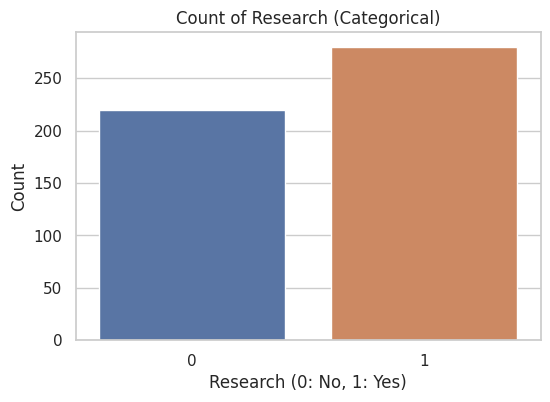

In [17]:
# Bar plot for categorical feature 'Research'
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Research')
plt.title('Count of Research (Categorical)')
plt.xlabel('Research (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

In [18]:
# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [19]:
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [20]:
scaled_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152


In [21]:
# Initialize classification models
models = {
    'Neural Network': MLPClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression()
}

In [22]:
# Train and evaluate each model on the scaled data
best_model = None
best_accuracy = 0
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': classification_rep
    }

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{classification_rep}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name

print(f"Best Model: {best_model} with Accuracy: {best_accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: Neural Network
Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        49
           1       0.88      0.86      0.87        51

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100

Model: K-Nearest Neighbors
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        49
           1       0.80      0.86      0.83        51

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100

Model: Gradient Boosting
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        49
           1       0.82      0.82      0.82      

In [23]:
# Identify the best model based on accuracy
print(f"Best Model: {best_model} (Accuracy: {best_accuracy:.2f})")

Best Model: Support Vector Machine (Accuracy: 0.88)


In [24]:
# Step 1: Choose hyperparameters (use defaults in this example)
svm_classifier = SVC()

In [25]:
# Step 2: Initialize the SVM classifier
svm_classifier = SVC()

In [26]:
# Step 3: Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

SVC()

In [27]:
# Step 4: Make predictions on the test data
svm_predictions = svm_classifier.predict(X_test)

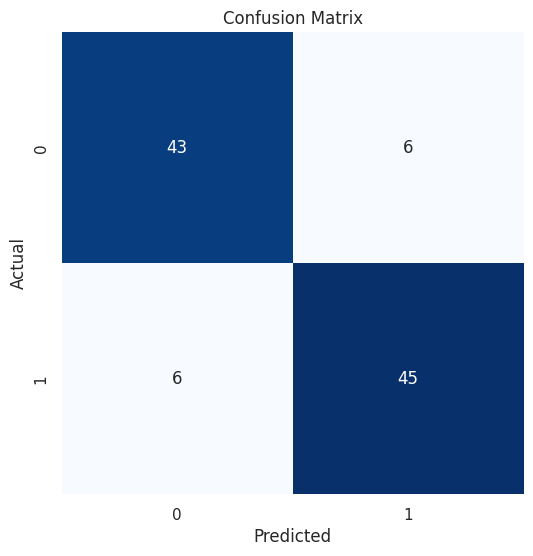

In [28]:
conf_matrix = confusion_matrix(y_test, svm_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [29]:
class_report = classification_report(y_test, svm_predictions, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.88      0.88      0.88        49
     Class 1       0.88      0.88      0.88        51

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



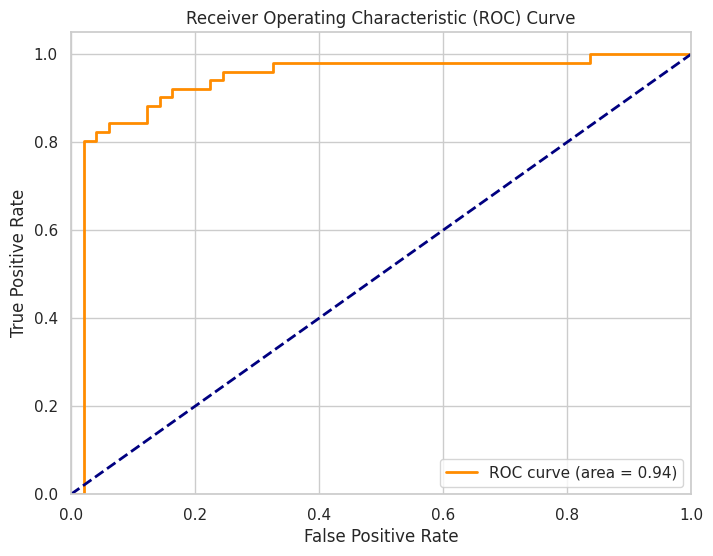

In [30]:
svm_probabilities = svm_classifier.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, svm_probabilities)
roc_auc = roc_auc_score(y_test, svm_probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [37]:
# Example: Predict the chance of admission for a new student using the best SVM model
new_student_data = np.array([[337, 118, 4, 4.5, 4.5, 9.65, 1]])
new_student_data = scaler.transform(new_student_data)  # Standardize the input
prediction = svm_classifier.predict(new_student_data)
print("Predicted Chance of Admit:", prediction[0])

Predicted Chance of Admit: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
